In [1]:
import pandas as pd
import matplotlib.pyplot as plt
startups=pd.read_excel("startups.xlsx")
startups.head()

,rd,admin,marketing,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
#EDA
startups.shape
startups.dtypes
startups.isna()


,rd,admin,marketing,state,profit
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [2]:
#creating dummy variables for state column
dummy=pd.get_dummies(startups.state)
dummy.columns="california","florida","ny"
startups = pd.concat([startups,dummy],axis=1)
startups.head()

,rd,admin,marketing,state,profit,california,florida,ny
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0


In [3]:
#droping state column from the startups data#
startups=startups.drop(['state'],axis=1)
startups.head()


,rd,admin,marketing,profit,california,florida,ny
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [18]:
#Splitting the data into train and test sets
from sklearn.model_selection import train_test_split
train,test = train_test_split(startups,test_size=0.3)


In [11]:
#Lasso Model

from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01,normalize=True)
lasso.fit(train.iloc[:,:],train.profit)

#coefficient values for all independent variables#
lasso.coef_
lasso.intercept_ #96.00675147665606

96.00675147665606

<BarContainer object of 7 artists>

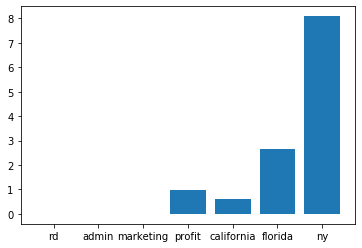

In [12]:
import matplotlib.pyplot as plt
plt.bar(height=pd.Series(lasso.coef_),x=pd.Series(startups.columns[:]))

In [14]:
lasso.alpha
pred_lasso=lasso.predict(train.iloc[:,:])
pred_lasso

array([141568.41483024, 149775.91933116, 134295.17015672, 124277.66974693,
        99941.76454898,  77795.62165781,  14727.62232653, 118469.198364  ,
       122776.71471681, 191789.72809778, 101009.28021381, 182901.67765995,
       110357.08023034, 132631.68382237,  42556.8422716 ,  96478.80323128,
       105023.43314613,  64899.03840598,  78227.39625647, 146113.25119138,
        96782.1804691 , 192273.82874125, 105741.78047204,  89956.30331611,
       103271.79359529, 108735.82472298, 107393.1801279 , 111321.01689566,
       144254.27119327, 125381.85122024, 155762.87844355,  90675.86107548,
       126975.08500116,  69745.08927842,  81218.95524128])

In [16]:
#R sq
lasso.score(train.iloc[:,:],train.profit) #0.9999998459656346
#Rmse
import numpy as np
np.sqrt(np.mean((pred_lasso-train.profit)**2)) #14.729769465257075

14.729769465257075

In [20]:
#running lasso regression of set of alpha values and observing how the r-squared,train_Rmse and test_rmse are changing with alpha values
train_rmse = []
test_rmse = []
R_sqrd = []
alphas = np.arange(0,30,0.05)
for i in alphas:
    LRM = Lasso(alpha = i,normalize=True,max_iter=500)
    LRM.fit(train.iloc[:,:3],train.profit)
    R_sqrd.append(LRM.score(train.iloc[:,:3],train.profit))
    train_rmse.append(np.sqrt(np.mean((LRM.predict(train.iloc[:,:3]) - train.profit)**2)))
    test_rmse.append(np.sqrt(np.mean((LRM.predict(test.iloc[:,:3]) - test.profit)**2)))

C:\Users\Rajesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
C:\Users\Rajesh\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Rajesh\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1299952909.5434299, tolerance: 6358806.507677504
  positive)


Text(0, 0.5, 'test_rmse')

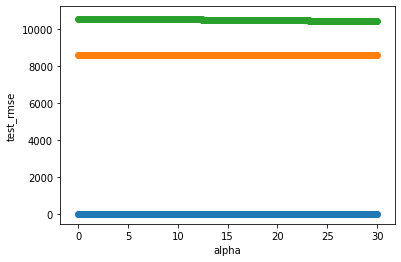

In [21]:
#### Plotting train_rmse,test_rmse,R_Squared values with respect to alpha values

# Alpha vs R_Squared values
plt.scatter(x=alphas,y=R_sqrd);plt.xlabel("alpha");plt.ylabel("R_Squared")

# Alpha vs train rmse
plt.scatter(x=alphas,y=train_rmse);plt.xlabel("alpha");plt.ylabel("train_rmse")

# Alpha vs test rmse
plt.scatter(x=alphas,y=test_rmse);plt.xlabel("alpha");plt.ylabel("test_rmse")



In [23]:

###RIDGE REGRESSION###
from sklearn.linear_model import Ridge
rm=Ridge(alpha=0.4,normalize=True)
rm.fit(train.iloc[:,:],train.profit)

Ridge(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

array([113661.3847537 , 185231.33558549, 129050.93350846, 132558.58254171,
       133711.88892849, 106078.89292065, 146858.21755479,  98534.44199403,
        78577.1880075 , 144489.69737654, 121859.59177834, 116959.95264088,
        82001.86230793,  49965.41832558, 170803.32246232, 178527.80600205,
        68190.16778915, 162524.72067032,  43612.85105624,  84855.94337522,
       135023.47375928,  80283.58245546, 103624.31807685,  40943.94551795,
        99834.52866998,  95967.19363245, 106917.50613541, 134074.66078688,
        96840.37269672, 116304.72334965,  69616.79523855, 154558.58104304,
       154860.0257673 , 100001.53279875, 103700.86049237])

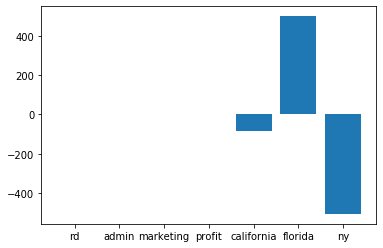

In [28]:
#coefficients values for all the independent vairbales#
rm.coef_
rm.intercept_ #27985.90341808123
plt.bar(height=pd.Series(rm.coef_),x=pd.Series(startups.columns[:]))
rm.alpha #0.4
pred_rm=rm.predict(train.iloc[:,:])
pred_rm

In [32]:
#adjusted r-square#
rm.score(train.iloc[:,:],train.profit) #0.9621812695606843
np.sqrt(np.mean((pred_rm-train.profit)**2)) #8289.097645696545

8289.097645696545

In [33]:

### Running a Ridge Regressor of set of alpha values and observing how the R-Squared, train_rmse and test_rmse are changing with change in alpha values
train_rmse = []
test_rmse = []
R_sqrd = []
alphas = np.arange(0,100,0.05)
for i in alphas:
    RM = Ridge(alpha = i,normalize=True)
    RM.fit(train.iloc[:,:3],train.profit)
    R_sqrd.append(RM.score(train.iloc[:,:3],train.profit))
    train_rmse.append(np.sqrt(np.mean((RM.predict(train.iloc[:,:3]) - train.profit)**2)))
    test_rmse.append(np.sqrt(np.mean((RM.predict(test.iloc[:,:3]) - test.profit)**2)))

Text(0, 0.5, 'test_rmse')

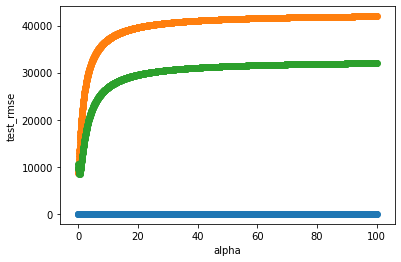

In [35]:

# Alpha vs R_Squared values
plt.scatter(x=alphas,y=R_sqrd);plt.xlabel("alpha");plt.ylabel("R_Squared")

# Alpha vs train rmse
plt.scatter(x=alphas,y=train_rmse);plt.xlabel("alpha");plt.ylabel("train_rmse")

# Alpha vs test rmse
plt.scatter(x=alphas,y=test_rmse);plt.xlabel("alpha");plt.ylabel("test_rmse")